Сталь – один из важнейших строительных материалов современности. Стальные здания устойчивы к естественному и искусственному износу, что сделало этот материал повсеместно распространенным во всем мире. Чтобы сделать производство стали более эффективным, этот конкурс поможет выявить дефекты.


ссылка на каггл с этим соревнованием - https://www.kaggle.com/c/severstal-steel-defect-detection

### Постановка задачи :

Этот конкурс представляет собой двойной конкурс: классифицируйте тип дефекта стали, а также сегментируйте части изображения, содержащие дефект.



In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import keras
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from keras.utils import to_categorical
from keras.models import Sequential
import tensorflow as tf
from keras.layers import Dense,Conv2D,Flatten,MaxPooling2D,Dropout

In [16]:
data = pd.read_csv('train.csv')

In [17]:
data

,ImageId,ClassId,EncodedPixels
0,0002cc93b.jpg,1,29102 12 29346 24 29602 24 29858 24 30114 24 3...
1,0007a71bf.jpg,3,18661 28 18863 82 19091 110 19347 110 19603 11...
2,000a4bcdd.jpg,1,37607 3 37858 8 38108 14 38359 20 38610 25 388...
3,000f6bf48.jpg,4,131973 1 132228 4 132483 6 132738 8 132993 11 ...
4,0014fce06.jpg,3,229501 11 229741 33 229981 55 230221 77 230468...
...,...,...,...
7090,ffcf72ecf.jpg,3,121911 34 122167 101 122422 169 122678 203 122...
7091,fff02e9c5.jpg,3,207523 3 207777 9 208030 15 208283 22 208537 2...
7092,fffe98443.jpg,3,105929 5 106177 14 106424 24 106672 33 106923 ...
7093,ffff4eaa8.jpg,3,16899 7 17155 20 17411 34 17667 47 17923 60 18...


In [18]:
data.shape

(7095, 3)

У нас 7095 и три фичи

# Разведочный анализ данных

ClassId
3    5150
1     897
4     801
2     247
Name: count, dtype: int64

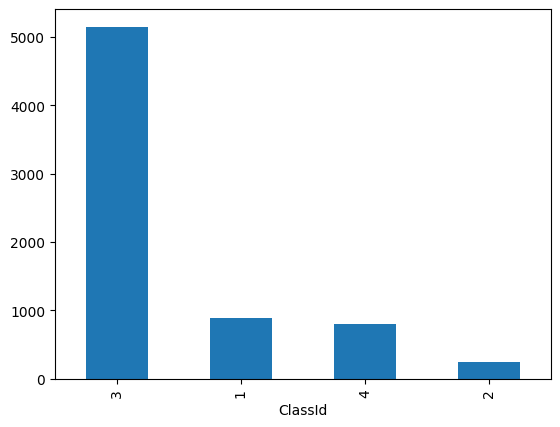

In [19]:
data["ClassId"].value_counts().plot(kind = 'bar')
data["ClassId"].value_counts()

больше всего меток третьего класса

Перекос данных, поэтому выполним аугментацию.

In [20]:
import cv2

In [21]:
!unzip "train_images.zip" -d "train_images"

"unzip" �� ���� ����७��� ��� ���譥�
��������, �ᯮ��塞�� �ணࠬ��� ��� ������ 䠩���.


In [22]:
l1=[]
l2=[]
for img,ClassId,EncodedPixels in tqdm(data.values):
    try:
      image=cv2.imread("train_images/{}".format(img),cv2.IMREAD_COLOR)
      image = cv2.resize(image,(120,120))
      l1.append(image)
      l2.append(ClassId)
    except:
      continue





100%|██████████| 7095/7095 [00:02<00:00, 3140.98it/s] 


In [23]:
l1[0]

array([[[  2,   2,   2],
        [  1,   1,   1],
        [  2,   2,   2],
        ...,
        [ 74,  74,  74],
        [ 60,  60,  60],
        [ 64,  64,  64]],

       [[  2,   2,   2],
        [  1,   1,   1],
        [  2,   2,   2],
        ...,
        [ 73,  73,  73],
        [ 66,  66,  66],
        [ 65,  65,  65]],

       [[  1,   1,   1],
        [  1,   1,   1],
        [  2,   2,   2],
        ...,
        [ 75,  75,  75],
        [ 65,  65,  65],
        [ 61,  61,  61]],

       ...,

       [[  1,   1,   1],
        [  1,   1,   1],
        [  1,   1,   1],
        ...,
        [114, 114, 114],
        [114, 114, 114],
        [105, 105, 105]],

       [[  1,   1,   1],
        [  1,   1,   1],
        [  1,   1,   1],
        ...,
        [112, 112, 112],
        [109, 109, 109],
        [108, 108, 108]],

       [[  1,   1,   1],
        [  1,   1,   1],
        [  1,   1,   1],
        ...,
        [117, 117, 117],
        [109, 109, 109],
        [109, 109, 109]]

In [24]:
len(l1)

351

Проверка изображений случайной стали, чтобы проверить, дефектна ли она или нет.

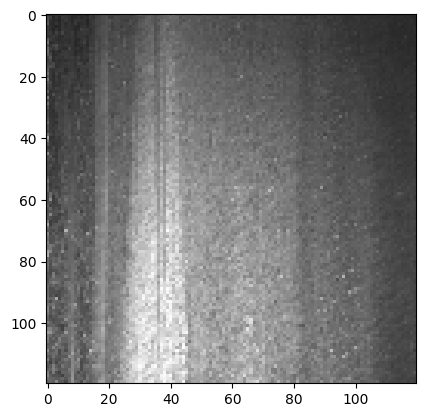

In [25]:
i = 15
plt.imshow(l1[i])

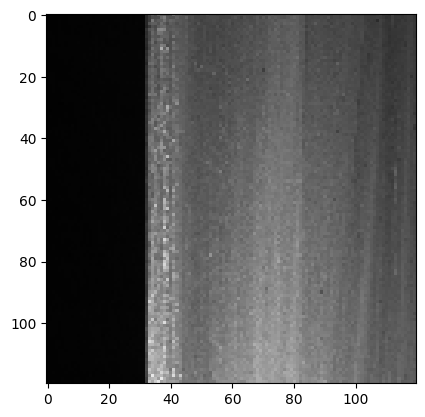

In [26]:
i = 16
plt.imshow(l1[i])

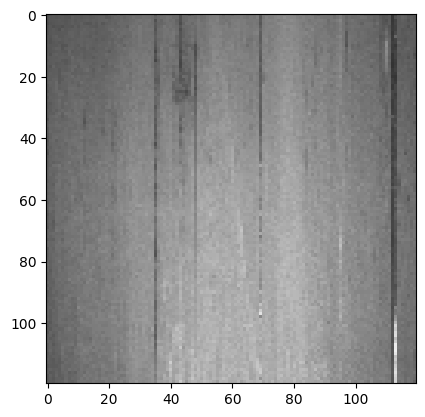

In [27]:
i = 90
plt.imshow(l1[i])

Выполним one-hot кодировку

In [28]:
encoder = LabelEncoder()

X= np.array(l1)
X = X/255

y = encoder.fit_transform(l2)
y = np.array(y)


In [29]:
X.shape

(351, 120, 120, 3)

In [30]:
y.shape

(351,)

# Борьба с дибалансом

для борьбы с дисбалансом выполним случайное сэмплирование

In [31]:
from imblearn.over_sampling import RandomOverSampler
reshaped_X = X.reshape(X.shape[0],-1)
oversample = RandomOverSampler(sampling_strategy='not majority')
X, y  = oversample.fit_resample(reshaped_X , y)
X = X.reshape(-1,120,120,3)

In [32]:
X.shape

(984, 120, 120, 3)

In [33]:

y = to_categorical(y)

In [34]:
y

array([[0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]], dtype=float32)

разделим на тренировку и валидацию

In [35]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y,shuffle=True)

In [36]:
print("x_train размер:",X_train.shape)
print("x_test размер:",X_test.shape)
print("y_train размер:",y_train.shape)
print("y_test размер:",y_test.shape)

x_train размер: (787, 120, 120, 3)
x_test размер: (197, 120, 120, 3)
y_train размер: (787, 4)
y_test размер: (197, 4)


# Построение нейронной сети  в 3 слоя и график обучения

In [37]:
model=Sequential()
model.add(Conv2D(32,(3,3),input_shape=(120,120,3),activation="relu"))
model.add(Flatten())
model.add(Dense(4,activation="softmax"))

In [38]:
model.compile(loss=keras.losses.categorical_crossentropy,
             optimizer=keras.optimizers.Adam(),
             metrics=["accuracy"])

In [40]:
history = model.fit(X_train,y_train,epochs=10,validation_data=(X_test,y_test),batch_size=128,
                    verbose=1)

Epoch 1/10
7/7 [==============================] - 3s 370ms/step - loss: 9.7850 - accuracy: 0.2910 - val_loss: 5.7686 - val_accuracy: 0.2640
Epoch 2/10
7/7 [==============================] - 2s 306ms/step - loss: 4.7238 - accuracy: 0.3812 - val_loss: 1.9360 - val_accuracy: 0.5025
Epoch 3/10
7/7 [==============================] - 2s 307ms/step - loss: 1.5997 - accuracy: 0.4854 - val_loss: 0.9341 - val_accuracy: 0.6345
Epoch 4/10
7/7 [==============================] - 2s 288ms/step - loss: 0.7607 - accuracy: 0.7306 - val_loss: 0.6884 - val_accuracy: 0.7107
Epoch 5/10
7/7 [==============================] - 2s 283ms/step - loss: 0.5689 - accuracy: 0.8374 - val_loss: 0.6182 - val_accuracy: 0.7766
Epoch 6/10
7/7 [==============================] - 2s 284ms/step - loss: 0.4636 - accuracy: 0.8513 - val_loss: 0.5066 - val_accuracy: 0.7919
Epoch 7/10
7/7 [==============================] - 2s 279ms/step - loss: 0.3793 - accuracy: 0.8755 - val_loss: 0.4314 - val_accuracy: 0.8883
Epoch 8/10
7/7 [====

<Axes: title={'center': 'Loss curve'}>

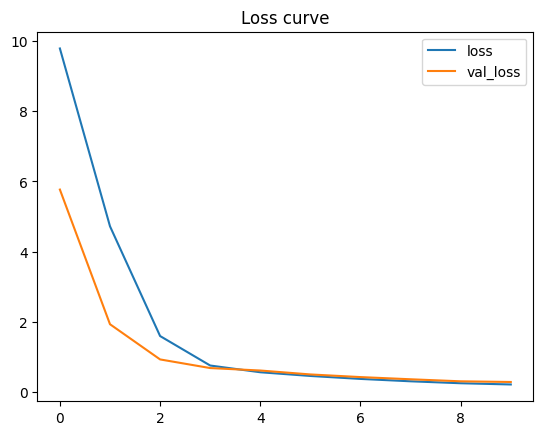

In [41]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title = 'Loss curve')

<Axes: title={'center': 'Accuracy curve'}>

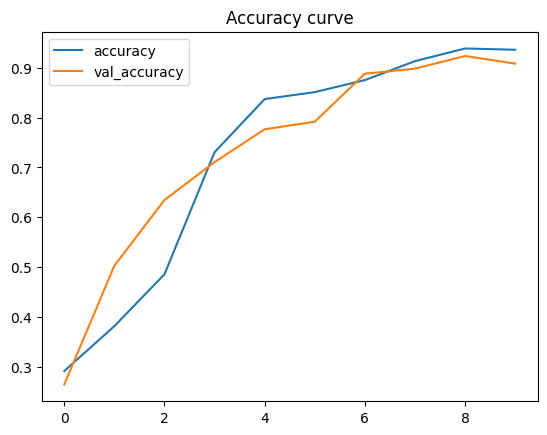

In [42]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['accuracy', 'val_accuracy']].plot(title = 'Accuracy curve')

# Построение нейронной сети  в 5 слоев

In [43]:
model=Sequential()
model.add(Conv2D(32,(3,3),input_shape=(120,120,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Flatten())
model.add(Dense(256,activation="relu"))
model.add(Dense(4,activation="softmax"))


In [44]:
model.compile(loss=keras.losses.categorical_crossentropy,
             optimizer=keras.optimizers.Adam(),
             metrics=["accuracy"])

In [45]:
history = model.fit(X_train,y_train,epochs=10,validation_data=(X_test,y_test),batch_size=128,
                    verbose=1)

Epoch 1/10
7/7 [==============================] - 3s 451ms/step - loss: 6.2054 - accuracy: 0.2808 - val_loss: 2.8420 - val_accuracy: 0.4010
Epoch 2/10
7/7 [==============================] - 3s 415ms/step - loss: 2.5609 - accuracy: 0.3405 - val_loss: 1.3211 - val_accuracy: 0.4061
Epoch 3/10
7/7 [==============================] - 3s 411ms/step - loss: 1.3212 - accuracy: 0.4600 - val_loss: 0.9923 - val_accuracy: 0.5787
Epoch 4/10
7/7 [==============================] - 3s 398ms/step - loss: 1.0045 - accuracy: 0.5426 - val_loss: 0.9082 - val_accuracy: 0.5635
Epoch 5/10
7/7 [==============================] - 3s 410ms/step - loss: 0.9054 - accuracy: 0.5845 - val_loss: 0.8604 - val_accuracy: 0.5888
Epoch 6/10
7/7 [==============================] - 3s 413ms/step - loss: 0.8057 - accuracy: 0.6633 - val_loss: 0.7806 - val_accuracy: 0.7157
Epoch 7/10
7/7 [==============================] - 3s 470ms/step - loss: 0.7228 - accuracy: 0.7433 - val_loss: 0.7112 - val_accuracy: 0.7665
Epoch 8/10
7/7 [====

<Axes: title={'center': 'Loss curve'}>

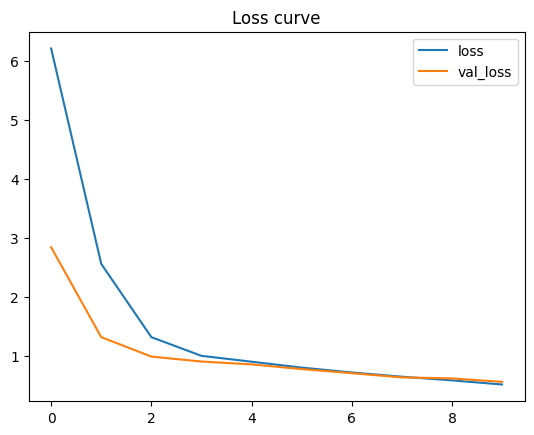

In [46]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title = 'Loss curve')

<Axes: title={'center': 'Accuracy curve'}>

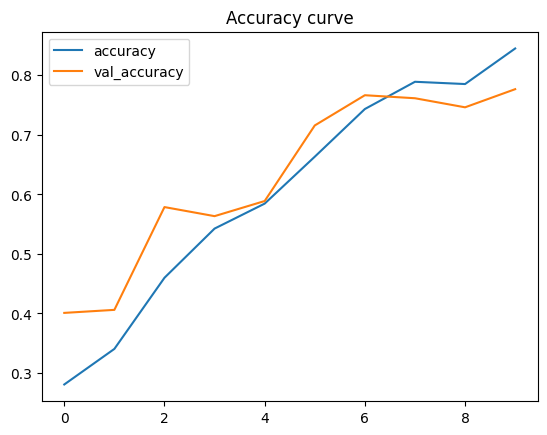

In [47]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['accuracy', 'val_accuracy']].plot(title = 'Accuracy curve')

# Построение нейронной сети в 13 слоев и обучение

In [48]:
model=Sequential()
model.add(Conv2D(32,(3,3),input_shape=(120,120,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Conv2D(64,(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Conv2D(64,(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(4,4)))
model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(128,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(256,activation="relu"))
model.add(Dense(4,activation="softmax"))

In [37]:
# early_stopping = tf.keras.callbacks.EarlyStopping(patience=5,min_delta=0.001,restore_best_weights=True)

Сборка и обучение модели

In [49]:
model.compile(loss=keras.losses.categorical_crossentropy,
             optimizer=keras.optimizers.Adam(),
             metrics=["accuracy"])

In [50]:
history = model.fit(X_train,y_train,epochs=10,validation_data=(X_test,y_test),batch_size=128,
                    verbose=1)

Epoch 1/10
7/7 [==============================] - 5s 583ms/step - loss: 1.3757 - accuracy: 0.2973 - val_loss: 1.3267 - val_accuracy: 0.3807
Epoch 2/10
7/7 [==============================] - 4s 537ms/step - loss: 1.3458 - accuracy: 0.3482 - val_loss: 1.3027 - val_accuracy: 0.4416
Epoch 3/10
7/7 [==============================] - 4s 535ms/step - loss: 1.2978 - accuracy: 0.3761 - val_loss: 1.1891 - val_accuracy: 0.4416
Epoch 4/10
7/7 [==============================] - 4s 535ms/step - loss: 1.1697 - accuracy: 0.4714 - val_loss: 1.0335 - val_accuracy: 0.4975
Epoch 5/10
7/7 [==============================] - 4s 595ms/step - loss: 1.0629 - accuracy: 0.4917 - val_loss: 0.9700 - val_accuracy: 0.5076
Epoch 6/10
7/7 [==============================] - 5s 653ms/step - loss: 1.0231 - accuracy: 0.5095 - val_loss: 0.9723 - val_accuracy: 0.5279
Epoch 7/10
7/7 [==============================] - 4s 621ms/step - loss: 0.9985 - accuracy: 0.5057 - val_loss: 0.9323 - val_accuracy: 0.5635
Epoch 8/10
7/7 [====

# Анализ результатов обучения

<Axes: title={'center': 'Loss curve'}>

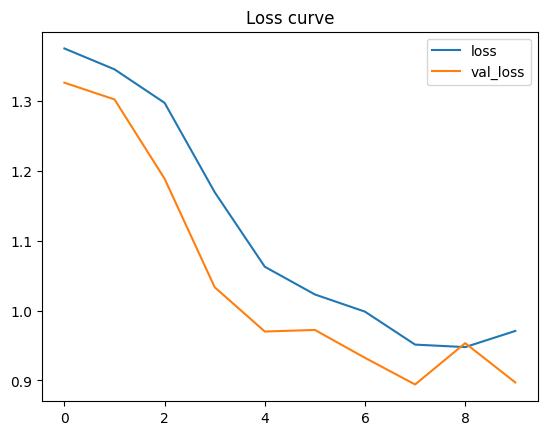

In [51]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title = 'Loss curve')

<Axes: title={'center': 'Accuracy curve'}>

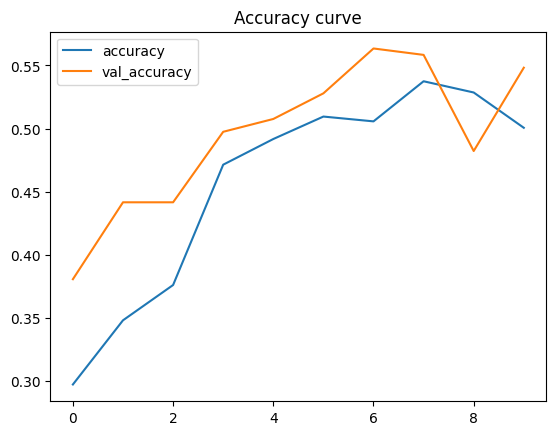

In [52]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['accuracy', 'val_accuracy']].plot(title = 'Accuracy curve')

In [53]:
result = model.evaluate(X_test, y_test)

loss = result[0]
accuracy = result[1]
print(f"[+] Accuracy: {accuracy*100:.2f}%")

7/7 [==============================] - 0s 44ms/step - loss: 0.8970 - accuracy: 0.5482
[+] Accuracy: 54.82%


In [54]:
from keras.models import Model
model.save('my_model_steel.keras')

In [44]:
from keras.models import load_model

loaded_model = load_model('my_model_steel.keras')


# Архитектура созданной нейронной сети

In [55]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 118, 118, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 39, 39, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 37, 37, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 10, 10, 64)        36928     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 2, 2, 64)        

# Тестирование на новых примерах

In [56]:
l2[:3]

[3, 3, 3]

In [57]:
X= np.array(l1[:3])
X = X/255

y = encoder.fit_transform(l2[:3])
y = np.array(y)

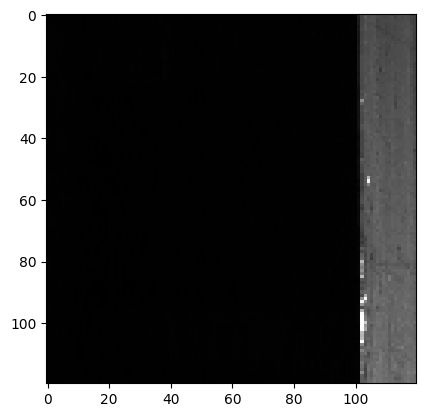

In [58]:
plt.imshow(l1[0]);

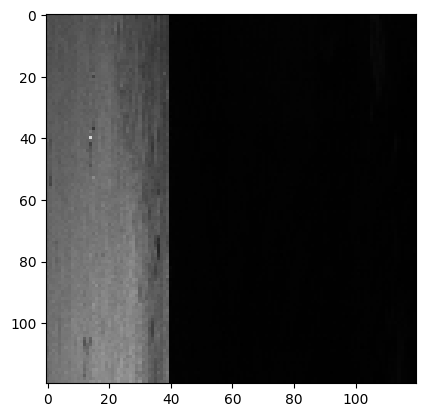

In [59]:
plt.imshow(l1[1]);

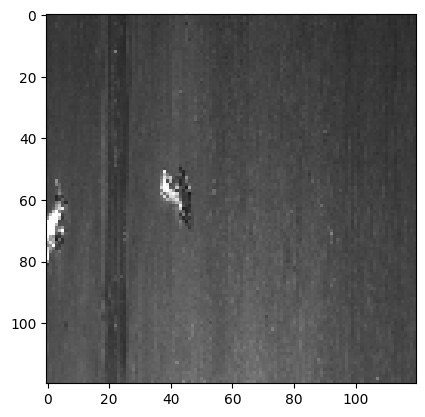

In [60]:
plt.imshow(l1[2]);

In [61]:
y =  to_categorical(y)
y

array([[1.],
       [1.],
       [1.]], dtype=float32)

In [62]:

predictions = model.predict(X)
predictions

1/1 [==============================] - 0s 118ms/step


array([[0.2754922 , 0.55457854, 0.11113764, 0.05879161],
       [0.04686157, 0.793428  , 0.11878332, 0.04092718],
       [0.16143753, 0.1578105 , 0.37517357, 0.30557832]], dtype=float32)

Здесь три эксперимента, где мы видим, что тест № 2 был с меткой 3, но неверно идентифицировался как метка 1.

In [63]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 118, 118, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 39, 39, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 37, 37, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 10, 10, 64)        36928     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 2, 2, 64)        

# описание архитектуры нейронной сети

У нас тут многослойная нейронная сеть с разными типами слоев.

теперь по поводу слоев нейронной сети и их особенностей.

1 слой - Conv2D. Он используется для выполнения двумерной свертки входных данных. Он применяет набор фильтров к входному изображению или карте объектов, перемещая их по входным данным и вычисляя скалярное произведение в каждом месте. Эта операция позволяет слою извлекать объекты и фиксировать пространственные отношения во входных данных. Уровень Conv2D обычно используется в сверточных нейронных сетях (CNN) для таких задач, как классификация изображений, обнаружение объектов и сегментация изображений.

2 слой - MaxPooling2D.  Это  операция понижающей дискретизации, которая уменьшает пространственные размеры (ширину и высоту) входного изображения или карты объектов. Он делит входные данные на непересекающиеся прямоугольники и выводит максимальное значение внутри каждого прямоугольника. Это помогает извлечь наиболее важные функции и снизить вычислительные требования для последующих слоев.

Далее эти слои повторяются еще 2 раза.

7 слой - Flatten. он преобразует входной тензор в одномерный массив, эффективно выравнивая его. Он принимает многомерный входной тензор, например двумерное изображение, и преобразует его в одномерный вектор, который можно использовать в качестве входных данных для полностью связного слоя или любого другого слоя, который ожидает одномерных входных данных.

8 слой - Dense. это полностью связный слой, который соединяет каждый нейрон предыдущего слоя с каждым нейроном текущего слоя. Он выполняет линейную операцию над входными данными, за которой следует функция активации, позволяющая сети изучать сложные закономерности и взаимосвязи в данных. Количество нейронов в плотном слое определяет размерность вывода.

9 cлой - Dropout. это метод регуляризации, используемый для уменьшения переобучения в нейронных сетях. Он случайным образом устанавливает для части входных единиц значение 0 на каждом этапе обучения, что помогает предотвратить слишком большую зависимость сети от конкретных функций или корреляций. Dropout улучшает способность модели к обобщению за счет внесения шума во время обучения и побуждает сеть изучать более надежные и независимые представления.

Далее слои повторяются.

В итоге в данной нейронной сети 12 различных слоев, и 139 780 параметров.

# DZ6

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import RandomOverSampler
from keras.models import Sequential, Model
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout
from keras.utils import to_categorical
from keras.metrics import MeanIoU

# Функция для вычисления коэффициента Дайса

In [65]:
def dice_coefficient(y_true, y_pred):
    smooth = 1e-6
    intersection = tf.reduce_sum(y_true * y_pred)
    union = tf.reduce_sum(y_true) + tf.reduce_sum(y_pred)
    return (2. * intersection + smooth) / (union + smooth)

# Загрузка данных

In [66]:
data = pd.read_csv('train.csv')

# Загрузка изображений и их классов

In [67]:
def load_images_and_labels(data):
    images = []
    labels = []
    for img, ClassId, EncodedPixels in tqdm(data.values):
        try:
            image = cv2.imread("train_images/{}".format(img), cv2.IMREAD_COLOR)
            image = cv2.resize(image, (120, 120))
            images.append(image)
            labels.append(ClassId)
        except:
            continue
    return np.array(images), np.array(labels)

In [68]:
X, y = load_images_and_labels(data)

100%|██████████| 7095/7095 [00:02<00:00, 3256.26it/s] 


# Предобработка данных

In [69]:
X = X / 255.0
encoder = LabelEncoder()
y = encoder.fit_transform(y)

# Решение проблемы несбалансированных классов

In [70]:
reshaped_X = X.reshape(X.shape[0], -1)
oversample = RandomOverSampler(sampling_strategy='not majority')
X_resampled, y_resampled = oversample.fit_resample(reshaped_X, y)
X_resampled = X_resampled.reshape(-1, 120, 120, 3)
y_resampled = to_categorical(y_resampled)

# Разделение на обучающий и тестовый наборы

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, stratify=y_resampled, shuffle=True)

# Построение модели сегментации

In [72]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(120, 120, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(4, activation="softmax"))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy', MeanIoU(num_classes=4), dice_coefficient])

# Обучение модели

In [73]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=128, verbose=1)

Epoch 1/10
7/7 [==============================] - 9s 1s/step - loss: 1.3443 - accuracy: 0.3278 - mean_io_u_1: 0.3750 - dice_coefficient: 0.2701 - val_loss: 1.2723 - val_accuracy: 0.3909 - val_mean_io_u_1: 0.3750 - val_dice_coefficient: 0.2904
Epoch 2/10
7/7 [==============================] - 6s 916ms/step - loss: 1.1453 - accuracy: 0.4867 - mean_io_u_1: 0.3750 - dice_coefficient: 0.3609 - val_loss: 1.1224 - val_accuracy: 0.4010 - val_mean_io_u_1: 0.3750 - val_dice_coefficient: 0.4111
Epoch 3/10
7/7 [==============================] - 6s 912ms/step - loss: 1.0416 - accuracy: 0.5044 - mean_io_u_1: 0.3750 - dice_coefficient: 0.4045 - val_loss: 1.0195 - val_accuracy: 0.5482 - val_mean_io_u_1: 0.3750 - val_dice_coefficient: 0.4344
Epoch 4/10
7/7 [==============================] - 7s 1s/step - loss: 0.9714 - accuracy: 0.5362 - mean_io_u_1: 0.3750 - dice_coefficient: 0.4615 - val_loss: 0.9439 - val_accuracy: 0.5482 - val_mean_io_u_1: 0.3750 - val_dice_coefficient: 0.4929
Epoch 5/10
7/7 [======

# Анализ результатов обучения

<Axes: title={'center': 'Accuracy curve'}>

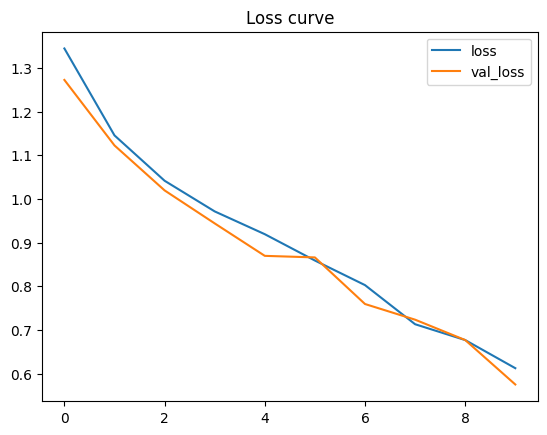

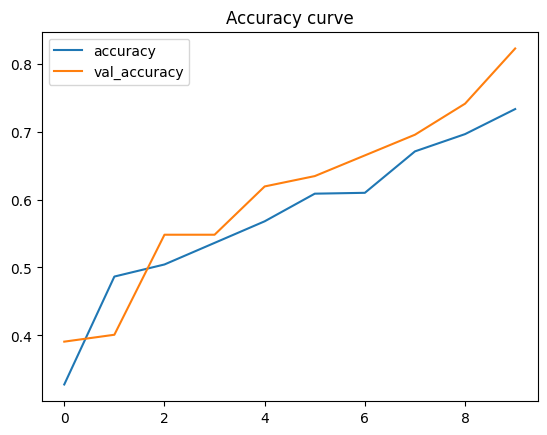

In [74]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title='Loss curve')
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['accuracy', 'val_accuracy']].plot(title='Accuracy curve')

# Оценка модели

In [75]:
result = model.evaluate(X_test, y_test)
loss = result[0]
accuracy = result[1]
iou = result[2]
dice = result[3]
print(f"Loss: {loss}, Accuracy: {accuracy}, IoU: {iou}, Dice coefficient: {dice}")


7/7 [==============================] - 0s 65ms/step - loss: 0.5753 - accuracy: 0.8223 - mean_io_u_1: 0.3750 - dice_coefficient: 0.6506
Loss: 0.5752692818641663, Accuracy: 0.8223350048065186, IoU: 0.375, Dice coefficient: 0.650619387626648


In [ ]:
model.save('segmentation_model.h5')

# Вывод

1. Значение функции потерь (loss) составляет 0.5753.
2. Точность модели (accuracy) равна 82.23%.
3. Значение среднего коэффициента пересечения объединений (IoU) составляет 0.375, что означает, что модель хорошо определяет области объектов на изображениях.
4. Коэффициент Дайса (Dice coefficient) составляет 0.6506, что также указывает на хорошее качество сегментации объектов на изображениях.
Общий вывод: модель достигла приемлемых результатов на тестовом наборе данных, с высокой точностью и хорошей способностью к сегментации объектов.
